In [1]:
import joblib

loadmodel = joblib.load("T1.joblib")

In [2]:
import pandas as pd
import numpy as np
from haversine import haversine, Unit

# Load the test file here
data = pd.read_csv("cct_train.csv")

# Calculating the dist between the user and merchant
def caldistance(row):
    ulocation = (row['lat'], row['long'])
    mlocation = (row['merch_lat'], row['merch_long'])
    return haversine(ulocation, mlocation, unit=Unit.KILOMETERS)

# Adding column to dataset
data['distance'] = data.apply(caldistance, axis=1)

#Dropping less important columns
x = data.drop(columns=['is_fraud', 'street', 'city', 'state', 'zip', 'lat', 'long', 'dob', 'trans_num', 'trans_date', 'merch_lat', 'merch_long'])
y = data['is_fraud']

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

#Feature Encoding
numfeatures = ['amt', 'city_pop', 'cc_num', 'acct_num', 'unix_time', 'distance']
catfeatures = ['first', 'last', 'category', 'job', 'profile', 'merchant', 'ssn']
numtransformer = Pipeline(steps=[('scaler', StandardScaler())])
cattransformer = Pipeline(steps=[('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numtransformer, numfeatures),
        ('cat', cattransformer, catfeatures)
    ])

x = preprocessor.fit_transform(x)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, accuracy_score, roc_curve

#Prediction and Performance metrics
ypred = loadmodel.predict(x)
acc = accuracy_score(y, ypred)
print(f"Test Accuracy (Best Model): {acc:.4f}")

# Confusion Matrix and Classification Report for the best model
print("Confusion Matrix (Best Model):\n", confusion_matrix(y, ypred))
print("\nClassification Report (Best Model):\n", classification_report(y, ypred))

Test Accuracy (Best Model): 0.9992
Confusion Matrix (Best Model):
 [[697061    167]
 [   375   3204]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    697228
           1       0.95      0.90      0.92      3579

    accuracy                           1.00    700807
   macro avg       0.97      0.95      0.96    700807
weighted avg       1.00      1.00      1.00    700807



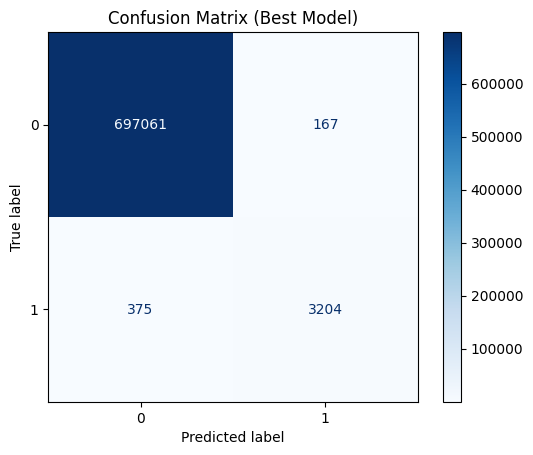

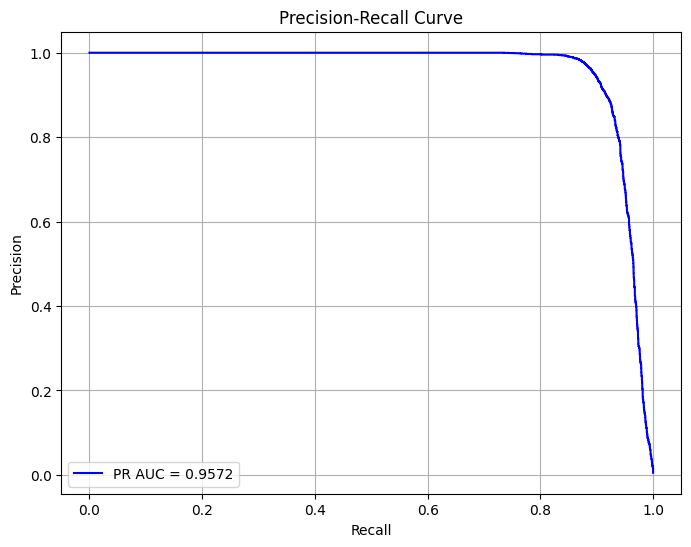

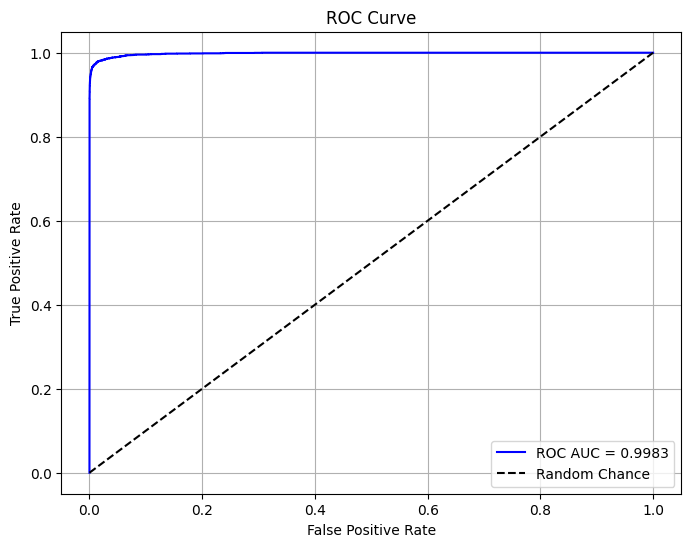

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay

# Visualizing Confusion Matrix
def plotcm(y, ypred, labels=None):
    cm = confusion_matrix(y, ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix (Best Model)")
    plt.show()

# Precision-Recall Curve
def plotpr(y, yprobs):
    precision, recall, _ = precision_recall_curve(y, yprobs)
    prauc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR AUC = {prauc:.4f}', color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

# ROC Curve
def plotroc(y, yprobs):
    fpr, tpr, _ = roc_curve(y, yprobs)
    roc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC AUC = {roc:.4f}', color='b')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Plotting
plotcm(y, ypred)

if hasattr(loadmodel, "predict_proba"):
    yprobs = loadmodel.predict_proba(x)[:, 1]
    plotpr(y, yprobs)
    plotroc(y, yprobs)
else:
    print("Model does not support probability predictions for PR/ROC curves.")

In [6]:
import joblib

loadmodel = joblib.load("T2.joblib")

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('har_train.csv')

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

#Adding feature names - The line I added
x.columns = loadmodel.feature_names_in_

# Encoding y
labelen = LabelEncoder()
yencoded = labelen.fit_transform(y)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, accuracy_score
#Prediction and Performance metrics
ypred = loadmodel.predict(x)
acc = accuracy_score(yencoded, ypred)
print(f"Test Accuracy (Best Model): {acc:.4f}")

# Confusion Matrix and Classification Report for the best model
print("Confusion Matrix (Best Model):\n", confusion_matrix(yencoded, ypred))
print("\nClassification Report (Best Model):\n", classification_report(yencoded, ypred))

Test Accuracy (Best Model): 0.9631
Confusion Matrix (Best Model):
 [[270   0   0   0   0   0   0   2   0   1   1]
 [  0 370   0   1   0   1   0  15   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0   0]
 [  0   2   0 109   0   0   0   6   0   0   0]
 [  1   0   0   0  16   0   0   0   0   0   0]
 [  1   0   0   0   0 692   0   2   0   1   0]
 [  0   0   0   0   0   0 115   7   0   0   0]
 [  1  16   0   0   0   1   2 557   1   1   0]
 [  0   0   0   0   0   0   1   0  58   0   0]
 [  1   1   0   0   0   0   0   6   0  73   3]
 [  0   4   0   0   0   0   0   9   2   0  79]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       274
           1       0.94      0.96      0.95       387
           2       1.00      1.00      1.00        12
           3       0.99      0.93      0.96       117
           4       1.00      0.94      0.97        17
           5       1.00      0.99      1.00       69

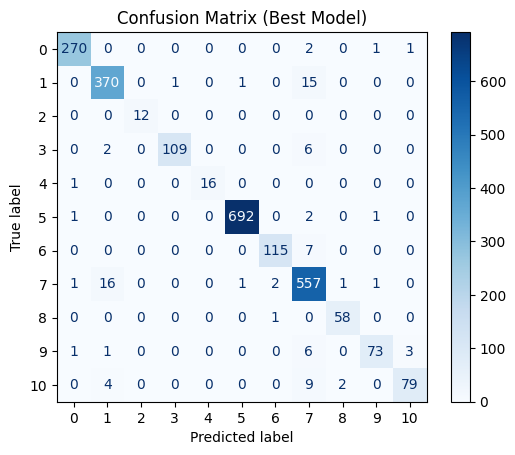

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay

# Visualizing Confusion Matrix
def plotcm(y, ypred, labels=None):
    cm = confusion_matrix(y, ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix (Best Model)")
    plt.show()

# Plotting
plotcm(yencoded, ypred)